# This notebook looks at different wards' voter turnout over the years

In [1]:
# importing R and Python

%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
%%R

# My commonly used R imports

require('tidyverse')

R[write to console]: Loading required package: tidyverse



── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [4]:
df_04_08 = pd.read_csv("mil_cnty_04_08.csv")
df_04_08 = df_04_08.sort_values(by = "PCTBLK", ascending = False)
df_04_08 = df_04_08.drop(columns = ["STR_WARDS", "CNTY_NAME", "MCD_NAME", "CTV", "ASM", "SEN", "CON", "PERSONS18", "WHITE18", "BLACK18", "HISPANIC18", "ASIAN18", "AMINDIAN18", "PISLAND18", "OTHER18", "OTHERMLT18", "PRETOT04", "PRETOT08"])
df_04_08

,GEOID,TURNOUT04,TURNOUT08,PCTBLK,PCTHIS,PCTASI
224,55079530000109,0.810153,0.783032,0.966620,0.010431,0.002086
227,55079530000112,0.659794,0.713719,0.962728,0.015067,0.000000
262,55079530000147,0.694271,0.721669,0.961395,0.014321,0.001868
261,55079530000146,0.730684,0.750552,0.960265,0.017660,0.000000
232,55079530000117,0.826214,0.899029,0.956311,0.016505,0.000000
...,...,...,...,...,...,...
76,55079311250001,0.951631,0.868391,0.000000,0.014623,0.044994
439,55079530000326,0.666667,0.666667,0.000000,0.666667,0.000000
5,5507905450001S,0.944444,0.944444,0.000000,0.055556,0.027778
82,55079311250007,0.799141,0.803437,0.000000,0.039742,0.021482


In [5]:
df_12_20 = pd.read_csv("mil_cnty_12_20.csv")
df_12_20 = df_12_20.sort_values(by = "PCTBLK", ascending = False)
df_12_20 = df_12_20.drop(columns = ["STR_WARDS", "CNTY_NAME", "MCD_NAME", "CTV", "ASM", "SEN", "CON", "PERSONS18", "WHITE18", "BLACK18", "HISPANIC18", "ASIAN18", "AMINDIAN18", "PISLAND18", "OTHER18", "OTHERMLT18", "PRETOT12", "PRETOT16", "PRETOT20"])
df_12_20

,GEOID,TURNOUT12,TURNOUT16,TURNOUT20,PCTBLK,PCTHIS,PCTASI
224,55079530000109,0.751739,0.515299,0.442976,0.966620,0.010431,0.002086
227,55079530000112,0.754956,0.526566,0.476606,0.962728,0.015067,0.000000
262,55079530000147,0.843711,0.551059,0.452677,0.961395,0.014321,0.001868
261,55079530000146,0.708609,0.545254,0.415011,0.960265,0.017660,0.000000
232,55079530000117,0.846602,0.576699,0.466990,0.956311,0.016505,0.000000
...,...,...,...,...,...,...,...
76,55079311250001,0.880765,0.833521,0.920135,0.000000,0.014623,0.044994
439,55079530000326,1.333333,1.666667,1.666667,0.000000,0.666667,0.000000
5,5507905450001S,1.277778,0.805556,0.916667,0.000000,0.055556,0.027778
82,55079311250007,0.867884,0.784103,0.859291,0.000000,0.039742,0.021482


In [6]:
df_04 = df_04_08.drop(columns = ["TURNOUT08"])
df_08 = df_04_08.drop(columns = ["TURNOUT04"])
df_12 = df_12_20.drop(columns = ["TURNOUT16", "TURNOUT20"])
df_16 = df_12_20.drop(columns = ["TURNOUT12", "TURNOUT20"])
df_20 = df_12_20.drop(columns = ["TURNOUT12", "TURNOUT16"])

df_04["YEAR"] = 2004
df_08["YEAR"] = 2008
df_12["YEAR"] = 2012
df_16["YEAR"] = 2016
df_20["YEAR"] = 2020
df_04 = df_04.rename(columns = {"TURNOUT04": "TURNOUT"})
df_08 = df_08.rename(columns = {"TURNOUT08": "TURNOUT"})
df_12 = df_12.rename(columns = {"TURNOUT12": "TURNOUT"})
df_16 = df_16.rename(columns = {"TURNOUT16": "TURNOUT"})
df_20 = df_20.rename(columns = {"TURNOUT20": "TURNOUT"})


In [7]:
df_04

,GEOID,TURNOUT,PCTBLK,PCTHIS,PCTASI,YEAR
224,55079530000109,0.810153,0.966620,0.010431,0.002086,2004
227,55079530000112,0.659794,0.962728,0.015067,0.000000,2004
262,55079530000147,0.694271,0.961395,0.014321,0.001868,2004
261,55079530000146,0.730684,0.960265,0.017660,0.000000,2004
232,55079530000117,0.826214,0.956311,0.016505,0.000000,2004
...,...,...,...,...,...,...
76,55079311250001,0.951631,0.000000,0.014623,0.044994,2004
439,55079530000326,0.666667,0.000000,0.666667,0.000000,2004
5,5507905450001S,0.944444,0.000000,0.055556,0.027778,2004
82,55079311250007,0.799141,0.000000,0.039742,0.021482,2004


In [8]:
df_08


,GEOID,TURNOUT,PCTBLK,PCTHIS,PCTASI,YEAR
224,55079530000109,0.783032,0.966620,0.010431,0.002086,2008
227,55079530000112,0.713719,0.962728,0.015067,0.000000,2008
262,55079530000147,0.721669,0.961395,0.014321,0.001868,2008
261,55079530000146,0.750552,0.960265,0.017660,0.000000,2008
232,55079530000117,0.899029,0.956311,0.016505,0.000000,2008
...,...,...,...,...,...,...
76,55079311250001,0.868391,0.000000,0.014623,0.044994,2008
439,55079530000326,0.666667,0.000000,0.666667,0.000000,2008
5,5507905450001S,0.944444,0.000000,0.055556,0.027778,2008
82,55079311250007,0.803437,0.000000,0.039742,0.021482,2008


In [9]:
df_12

,GEOID,TURNOUT,PCTBLK,PCTHIS,PCTASI,YEAR
224,55079530000109,0.751739,0.966620,0.010431,0.002086,2012
227,55079530000112,0.754956,0.962728,0.015067,0.000000,2012
262,55079530000147,0.843711,0.961395,0.014321,0.001868,2012
261,55079530000146,0.708609,0.960265,0.017660,0.000000,2012
232,55079530000117,0.846602,0.956311,0.016505,0.000000,2012
...,...,...,...,...,...,...
76,55079311250001,0.880765,0.000000,0.014623,0.044994,2012
439,55079530000326,1.333333,0.000000,0.666667,0.000000,2012
5,5507905450001S,1.277778,0.000000,0.055556,0.027778,2012
82,55079311250007,0.867884,0.000000,0.039742,0.021482,2012


In [10]:
df_16

,GEOID,TURNOUT,PCTBLK,PCTHIS,PCTASI,YEAR
224,55079530000109,0.515299,0.966620,0.010431,0.002086,2016
227,55079530000112,0.526566,0.962728,0.015067,0.000000,2016
262,55079530000147,0.551059,0.961395,0.014321,0.001868,2016
261,55079530000146,0.545254,0.960265,0.017660,0.000000,2016
232,55079530000117,0.576699,0.956311,0.016505,0.000000,2016
...,...,...,...,...,...,...
76,55079311250001,0.833521,0.000000,0.014623,0.044994,2016
439,55079530000326,1.666667,0.000000,0.666667,0.000000,2016
5,5507905450001S,0.805556,0.000000,0.055556,0.027778,2016
82,55079311250007,0.784103,0.000000,0.039742,0.021482,2016


In [11]:
df_20

,GEOID,TURNOUT,PCTBLK,PCTHIS,PCTASI,YEAR
224,55079530000109,0.442976,0.966620,0.010431,0.002086,2020
227,55079530000112,0.476606,0.962728,0.015067,0.000000,2020
262,55079530000147,0.452677,0.961395,0.014321,0.001868,2020
261,55079530000146,0.415011,0.960265,0.017660,0.000000,2020
232,55079530000117,0.466990,0.956311,0.016505,0.000000,2020
...,...,...,...,...,...,...
76,55079311250001,0.920135,0.000000,0.014623,0.044994,2020
439,55079530000326,1.666667,0.000000,0.666667,0.000000,2020
5,5507905450001S,0.916667,0.000000,0.055556,0.027778,2020
82,55079311250007,0.859291,0.000000,0.039742,0.021482,2020


In [12]:
df = pd.concat([df_04, df_08, df_12, df_16, df_20])
df

,GEOID,TURNOUT,PCTBLK,PCTHIS,PCTASI,YEAR
224,55079530000109,0.810153,0.966620,0.010431,0.002086,2004
227,55079530000112,0.659794,0.962728,0.015067,0.000000,2004
262,55079530000147,0.694271,0.961395,0.014321,0.001868,2004
261,55079530000146,0.730684,0.960265,0.017660,0.000000,2004
232,55079530000117,0.826214,0.956311,0.016505,0.000000,2004
...,...,...,...,...,...,...
76,55079311250001,0.920135,0.000000,0.014623,0.044994,2020
439,55079530000326,1.666667,0.000000,0.666667,0.000000,2020
5,5507905450001S,0.916667,0.000000,0.055556,0.027778,2020
82,55079311250007,0.859291,0.000000,0.039742,0.021482,2020


In [13]:
df.to_csv("turnout_all_year.csv", index = False)

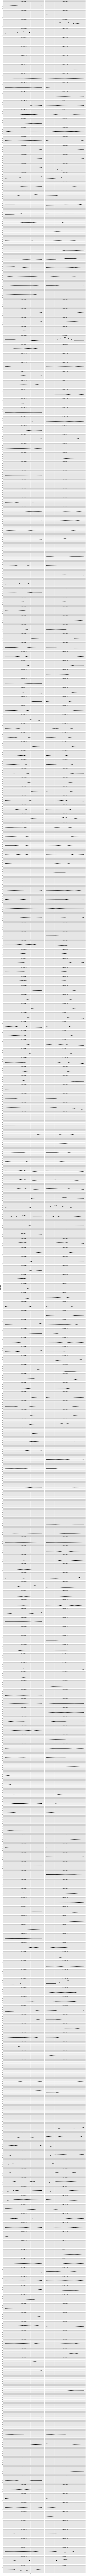

In [14]:
%%R -i df -w 1000 -h 30000

ggplot(df) +
    geom_line(aes(x = YEAR, y = TURNOUT)) +
    facet_wrap(vars(GEOID), nrow = 285)


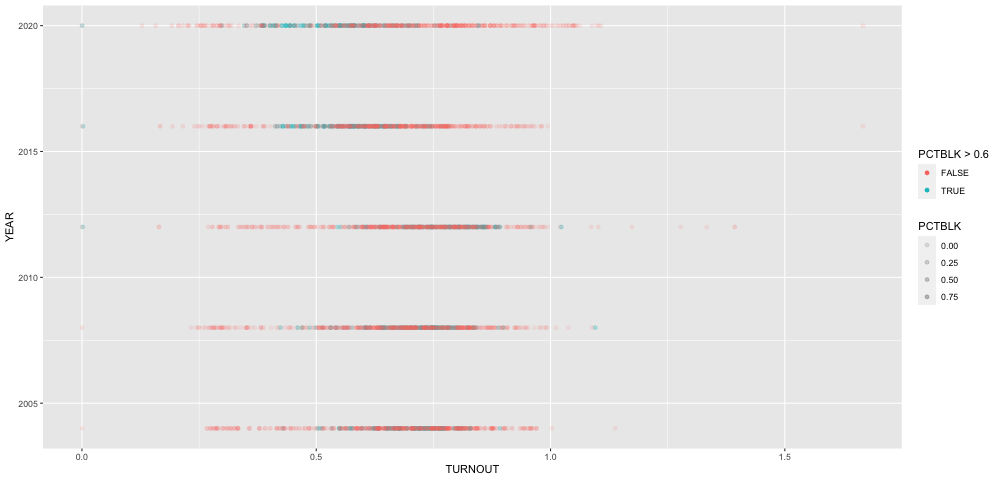

In [15]:
%%R -w 1000

ggplot(df) +
    aes(x=TURNOUT, y=YEAR, color=PCTBLK>0.6, alpha=PCTBLK) +
    scale_alpha_continuous(range = c(0.1, 0.3)) +
    geom_point()

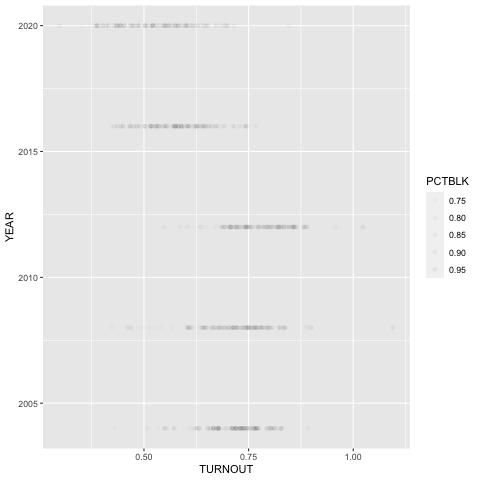

In [16]:
%%R

df_blk <- df %>% filter(PCTBLK > 0.7)

ggplot(df_blk) +
    aes(x=TURNOUT, y=YEAR, alpha=PCTBLK) +
    scale_alpha_continuous(range = c(0.01, 0.05)) +
    geom_point()

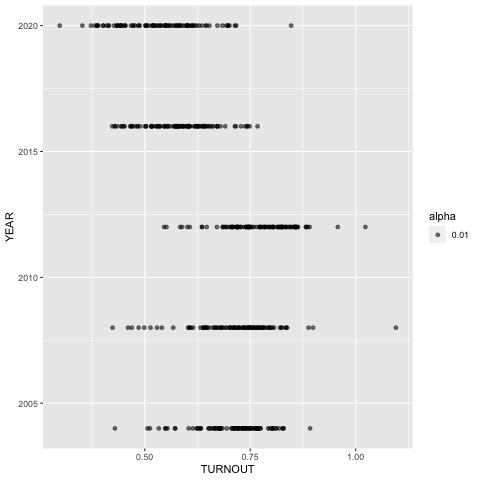

In [17]:
%%R

ggplot(df_blk) +
    aes(x=TURNOUT, y=YEAR, alpha=0.01) +
    geom_point()

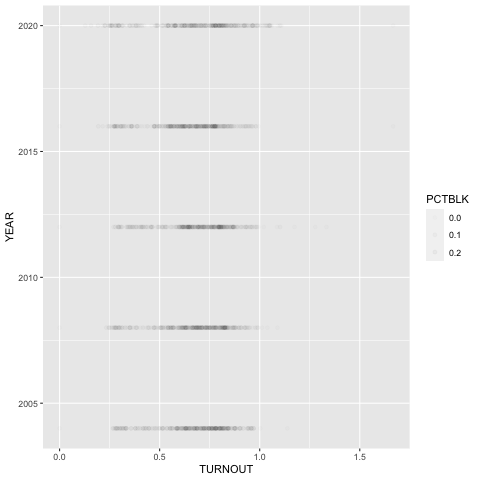

In [18]:
%%R

df_nb <- df %>% filter(PCTBLK < 0.3)

ggplot(df_nb) +
    aes(x=TURNOUT, y=YEAR, alpha=PCTBLK) +
    scale_alpha_continuous(range = c(0.01, 0.05)) +
    geom_point()